# Importando o modelo treinado

In [38]:
import pandas as pd
import os
from dotenv import load_dotenv
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
load_dotenv()

diretorio_projeto = os.getenv("DIRETORIO_PROJETO") # Carregando o diretorio do projeto
 
modelo = pickle.load(open(diretorio_projeto + "/models/melhor_modelo_rf.pkl", "rb")) # Carregando o modelo treinado

modelo

RandomForestRegressor(max_depth=20, n_estimators=50, random_state=42)

# Carregando os dados que serão usados para testar o modelo

In [5]:
dados = pickle.load(open(diretorio_projeto + "/models/dados_treinamento.pkl", "rb"))

x_train = dados['x_train']
x_test = dados['x_test']
y_train = dados['y_train']
y_test = dados['y_test']

# Plotagens

Vamos fazer algumas plotagens para avaliar o desempenho geral do modelo. Utilizaremos os dados de treino e teste.

In [7]:
predicoes_treino = modelo.predict(x_train) # Predições nos dados de treinamento
predicoes_teste = modelo.predict(x_test) # Predições nos dados de teste

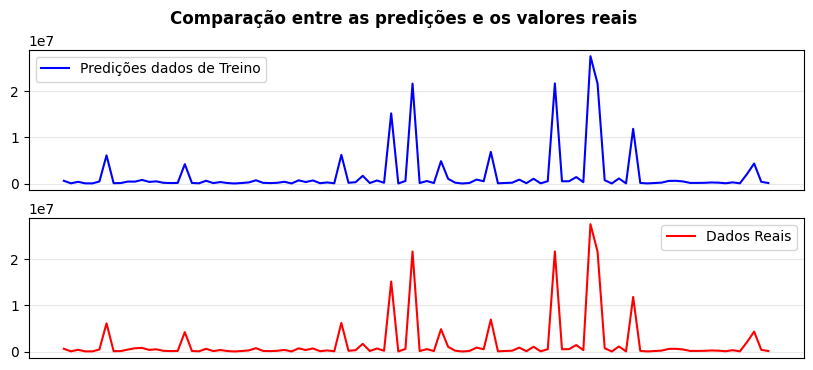

In [33]:
fig, axs = plt.subplots(2, 1, figsize = (10, 4))
axs[0].plot(range(len(predicoes_teste[0:100])), predicoes_teste[0:100], label = "Predições dados de Treino", color = 'b')
axs[0].legend()
axs[1].plot(range(len(y_test[0:100])), y_test[0:100], label = "Dados Reais", color = 'r')
axs[1].legend()
plt.suptitle("Comparação entre as predições e os valores reais", fontweight = 'bold')
axs[0].set_xticks([])
axs[1].set_xticks([])
axs[0].grid(alpha = 0.3)
axs[1].grid(alpha = 0.3)
plt.show()

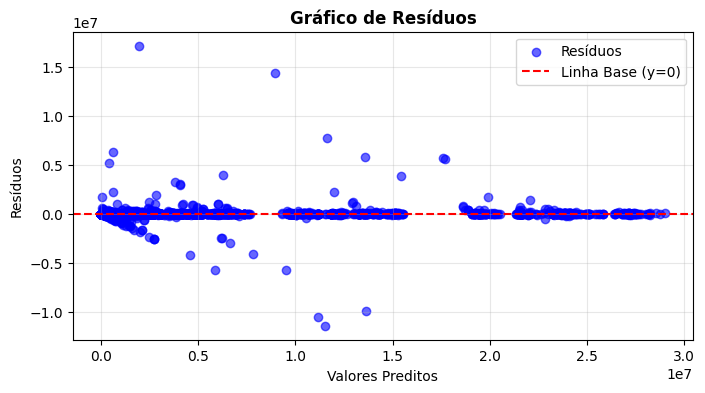

In [36]:
# Cálculo dos resíduos os resíduos
residuos = y_test - predicoes_teste

# Criando o gráfico de resíduos
plt.figure(figsize = (8, 4))
plt.scatter(predicoes_teste, residuos, color = 'blue', alpha = 0.6, label = 'Resíduos')
plt.axhline(y = 0, color = 'red', linestyle = '--', label = 'Linha Base (y=0)')

# Adicionar rótulos e título
plt.title('Gráfico de Resíduos', fontweight = 'bold')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.legend()
plt.grid(alpha=0.3)

# Mostrar o gráfico
plt.show()

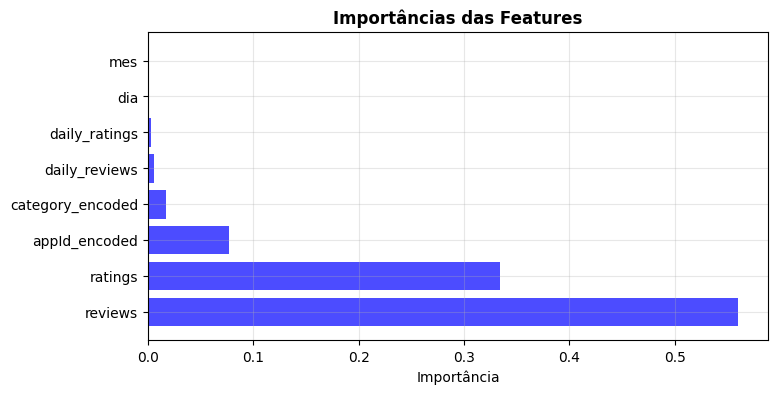

In [45]:
# Obtendo as importâncias das features
importances = modelo.feature_importances_

# Ordenar as importâncias e os nomes das features
indices = np.argsort(importances)[::-1]
sorted_features = [x_test.columns[i] for i in indices]

# Plotar as importâncias das features
plt.figure(figsize=(8, 4))
plt.barh(sorted_features, importances[indices], color='blue', alpha=0.7)
plt.xlabel('Importância')
plt.title('Importâncias das Features', fontweight = 'bold')
plt.grid(alpha=0.3)
plt.show()

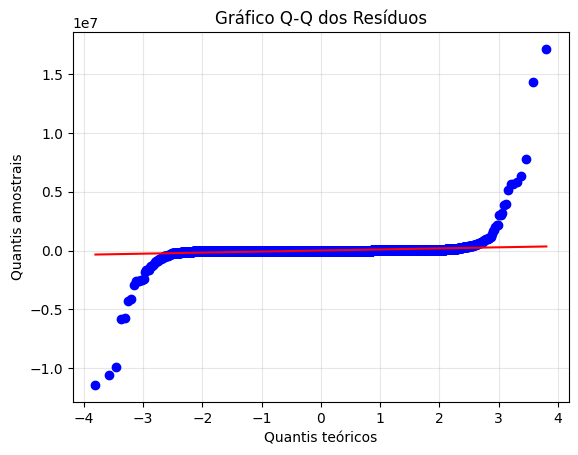

In [47]:
import scipy.stats as stats

stats.probplot(residuos, dist="norm", plot=plt)
plt.title('Gráfico Q-Q dos Resíduos')
plt.grid(alpha=0.3)
plt.xlabel("Quantis teóricos")
plt.ylabel("Quantis amostrais")
plt.show()

In [50]:
# Métricas
from sklearn.metrics import mean_squared_error

# Funções para calcular as métricas
def mean_absolute_percentage_error(y_true, y_pred):
    """Calcula o MAPE (Mean Absolute Percentage Error)."""
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def median_absolute_percentage_error(y_true, y_pred):
    """Calcula o MedAPE (Median Absolute Percentage Error)."""
    return np.median(np.abs((y_true - y_pred) / y_true)) * 100

def root_mean_squared_error(y_true, y_pred):
    """Calcula o RMSE (Root Mean Squared Error)."""
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Calculando as métricas
mape = mean_absolute_percentage_error(y_test, predicoes_teste)
medape = median_absolute_percentage_error(y_test, predicoes_teste)
rmse = root_mean_squared_error(y_test, predicoes_teste)

# Criando uma tabela com as métricas
tabela_metricas = pd.DataFrame({
    'Métrica': ['MAPE', 'MedAPE', 'RMSE'],
    'Valor': [mape, medape, rmse]
})

In [51]:
tabela_metricas

,Métrica,Valor
0,MAPE,34.814402
1,MedAPE,0.460846
2,RMSE,372971.112339
